In [71]:
import tweepy
import os
import wget
from dotenv import load_dotenv
from tensorflow.keras.models import load_model
from face_detection import *
from dictionarys import emotion_numbers
import matplotlib.pyplot as plt

load_dotenv()
auth = tweepy.OAuthHandler(os.getenv("TWITTER_API_KEY"),os.getenv("TWITTER_API_SECRET") )
auth.set_access_token( os.getenv("ACCESS_TOKEN"), os.getenv("ACCESS_TOKEN_SECRET"))
api = tweepy.API(auth)

In [73]:
from face_detection import *
sentiment_analysis=load_model(filepath="../../../models/model_complex_with_data_augmentation_rotatation_25degrees.h5",compile=True)    

OSError: SavedModel file does not exist at: ../../../models/model_complex_with_data_augmentation_rotatation_25degrees.h5/{saved_model.pbtxt|saved_model.pb}

Happy


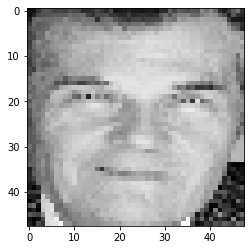

This tweet has no picture attached
Neutral


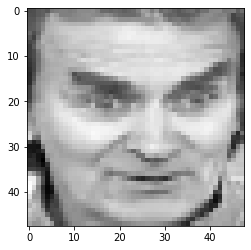

Neutral


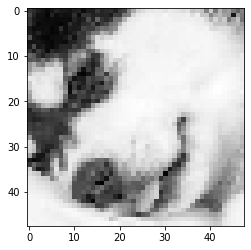

This tweet has no picture attached
Neutral


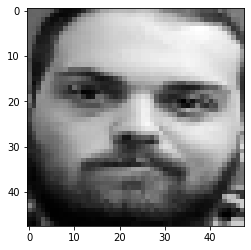

This tweet has no picture attached
This tweet has no picture attached
Happy


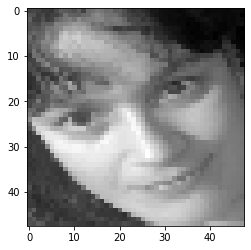

This tweet has no picture attached
This tweet has no picture attached
Angry


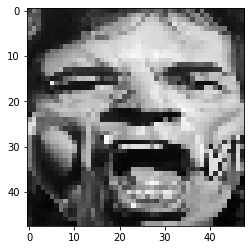

In [70]:
%matplotlib inline

import wget
from face_detection import *
import os
from dictionarys import emotion_numbers
import matplotlib.pyplot as plt

for status in api.mentions_timeline():
    try:
        url=status._json["entities"]["media"][0]["media_url"]
        os.chdir("face_detection/photos")
        image=wget.download(url)
        face=face_detection(image)
        sentiment=sentiment_analysis.predict_classes(face)[0]
        print(emotion_numbers[sentiment])
        plt.imshow(face.reshape((48,48)),cmap="gray")
        plt.show()
        os.remove(image)
        os.chdir("../..")
    except:
        print("This tweet has no picture attached")